In [1]:
import os 
from random import randint
from datetime import datetime
from pyvi import ViTokenizer
from gensim import corpora, matutils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice
import pickle
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, metrics, svm
from sklearn.model_selection import GridSearchCV, KFold
import gensim
import gensim.downloader as gensim_api
from gensim.models import Word2Vec

from file_loader import FileStore, FileReader, DataLoader
from preprocessing import *
import const

In [2]:
dataLoader = DataLoader(const.DATA_PATH)
data = dataLoader.get_json()

fileReader = FileReader('./data/vietnamese-stopwords.txt')
stopwordLst = fileReader.read_stopwords()

In [3]:
features = []
labels = []
for d in data:
    features.append(d['content'])
    labels.append(d['category'])

In [4]:
label_dict = dict(
                    zip(
                        sorted(set(labels), key=labels.index), 
                        range(len(labels))
                        )
                )
label_dict

{'Van hoa': 0,
 'The gioi': 1,
 'Khoa hoc': 2,
 'Suc khoe': 3,
 'Chinh tri Xa hoi': 4,
 'Vi tinh': 5,
 'Kinh doanh': 6,
 'The thao': 7,
 'Phap luat': 8,
 'Doi song': 9}

In [5]:
label_indices = [label_dict[label] for label in labels]

In [6]:
features = [processing(article, stopwordLst) for article in features]

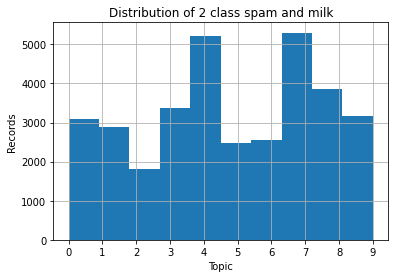

In [7]:
label_series = pd.Series(label_indices)

label_series.hist(bins=10)
plt.xticks(range(10))

plt.ylabel('Records')
plt.xlabel('Topic')
plt.title('Distribution of 2 class spam and milk')
plt.show()

In [8]:
def train_word2vec(sentences):
    w2v_model = Word2Vec(
        sentences,
        vector_size=50,
        window=3,
        min_count=1,
        sg= 1,
        workers=4,
        seed = 42,
        epochs =100)
    return w2v_model

In [9]:


sentences = [row.strip().split(" ") for row in features]
print(sentences[0])
word2vec_model = train_word2vec(sentences)
print(len(word2vec_model.wv))


['đồ', 'đảo', 'vua', 'tần', 'cỡi', 'cọp', 'tám', 'cõi', 'trời', 'xanh', 'kiếm', 'quang', 'chói', 'tiên_nhân', 'cầm', 'đuốc', 'khói', 'nhẹ_nhàng', 'mắt', 'say', 'nhòa', 'lệ', 'cung', 'đàn', 'bãi', 'biển', 'lộng_gió', 'đồ', 'võ', 'hiển', 'đọc', 'tần', 'vương', 'ẩm', 'tửu', 'lý', 'hạ', 'mệnh_danh', 'thi', 'quỉ', 'đời', 'đường', 'tiếng_tăm', 'tác_phẩm', 'truyền', 'lưu', 'hậu_thế', 'thua_kém', 'thi', 'tiên', 'lý', 'bạch', 'thi', 'phật', 'vương', 'thi', 'thánh', 'đỗ_phủ', 'tâm_sự', 'sinh', 'nho_học', 'mạt_vận', 'may_mắn', 'học', 'dăm', 'chữ', 'thánh_hiền', 'mớ', 'chữ_nghĩa', 'thời', 'vang', 'bóng', 'tâm_giao', 'viết', 'câu_đối', 'xưa', 'men', 'đường', 'bãi', 'biển', 'rợp', 'bóng', 'dừa', 'xanh', 'thôn', 'tây', 'xã', 'an', 'vĩnh', 'huyện', 'đảo', 'lý', 'sơn', 'quảng_ngãi', 'dừng', 'cổ', 'đồ', 'hòn', 'đảo', 'hoành_phi', 'câu_đối', 'viết', 'mực_tàu', 'bút_lông', 'nét', 'chữ', 'rồng', 'múa', 'phượng', 'bay', 'treo', 'hàng', 'cột', 'bờ', 'hiên', 'tận', 'bàn_thờ', 'tổ_tiên', 'gian', 'sập', 'gụ', '

In [16]:
word2vec_feature = []
for tweet in sentences:
    average_vec = np.zeros(300)
    for word in tweet:
        if word in word2vec_model.wv:
            average_vec += (word2vec_model.wv[word] / len(tweet))
        else:
            pass
    word2vec_feature.append(average_vec)

ValueError: operands could not be broadcast together with shapes (300,) (50,) (300,) 

In [14]:
w2v = MeanEmbeddingVectorizer(word2vec_model)

AttributeError: 'Word2Vec' object has no attribute 'itervalues'

In [20]:
word2vec_model.wv.most_similar(positive=["hương"])

[('khiết', 0.797921895980835),
 ('huyền', 0.796534538269043),
 ('ngọc_lan', 0.7943359613418579),
 ('linh', 0.7859314680099487),
 ('úc_tỏa', 0.7758122086524963),
 ('quỳnh', 0.7683915495872498),
 ('thắm', 0.7655832171440125),
 ('văn_tụy', 0.7618129849433899),
 ('bích', 0.7609907388687134),
 ('hồng', 0.7516719698905945)]